In [1]:
import pandas as pd

df_clean = pd.read_pickle("df_clean_v1_07122021.pkl")
print(df_clean.shape)
df_clean.head()

(16068, 18)


,lyrics,explicit,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,genres,genre,artist
song_id,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,"[dance pop, pop, post-teen pop]",dance/electronic,Ariana Grande
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,"[dance pop, electropop, etherpop, indie poptim...",dance/electronic,Halsey
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,"[pop, pop rap, rap]",pop rap,Travis Scott
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,"[baroque pop, emo, modern rock, pop punk]",pop,Panic! At The Disco
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,18,christmas,Mariah Carey


In [2]:
#df_clean.to_pickle("df_clean_v1_07122021.pkl", protocol=4)

# fast clustering
- https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/fast_clustering.py
- https://github.com/UKPLab/sentence-transformers/blob/10e1599339de3cefaedce91967275310c4c5dd82/sentence_transformers/util.py#L333

In [2]:
corpus_sentences = list(df_clean["lyrics"])

In [3]:
from sentence_transformers import SentenceTransformer, util


# load model
mpnet_base = SentenceTransformer('all-mpnet-base-v2')    # max length 384

In [4]:
import time
import torch

corpus_embeddings = torch.load('all-mpnet-base-v2_embeddings_07122021.pt')

# num_sentences = len(corpus_sentences)

# subset = corpus_sentences[:num_sentences]

# start_time = time.time()
# corpus_embeddings = mpnet_base.encode(subset, batch_size=64, show_progress_bar=True, convert_to_tensor=True)
# proc_time = time.time() - start_time
# print(f"Time for computing embeddings : {proc_time} seconds")    # about 10 minutes
# print(f"{proc_time / num_sentences} seconds per song")
# torch.save(corpus_embeddings, 'all-mpnet-base-v2_embeddings_07122021.pt')

In [5]:
corpus_embeddings.shape

torch.Size([16068, 768])

In [7]:
print("Start clustering")
start_time = time.time()


# 25 and 0.7 works well
min_community_size = 25
threshold = 0.7

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least X elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=min_community_size, threshold=threshold)

print(f"number of clusters : {len(clusters)}")
n_clustered_songs = 0
for c in clusters:
    n_clustered_songs += len(c)
print(f"Number of unclustered songs : {len(corpus_embeddings) - n_clustered_songs}")
print("Clustering done after {:.2f} sec".format(time.time() - start_time))

Start clustering
number of clusters : 9
Number of unclustered songs : 13042
Clustering done after 2.17 sec


In [9]:
#Print lyrics of clusters
max_len = 300
print_n_songs = 5
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:print_n_songs]:
        print("\t", corpus_sentences[sentence_id][:max_len])
#     print("\t", "...")
#     for sentence_id in cluster[-3:]:
#         print("\t", corpus_sentences[sentence_id][:max_len])


Cluster 1, #2237 Elements 
	 You say you'll be down in five. The smell of your perfume is floating down the stairs. You're fixing up your hair like you do. I know that I'll be a mess. The second that I see you. You won't be surprised. It happens every time. It's nothin' new. It's always on a night like tonight. I thank God, you
	 We haven't talked all morning. Bang my head, bang my head against the wall. I'm scared, I'm falling. Losing all, losing all my control. And I'm tired of talking. Feel myself saying the same old things. But this love's important. Don't wanna lose, don't wanna lose you this way. . I, I, I, I, I, I, I,
	 Life is so simple. A little boy, a little girl. Laughing and loving. Tryin' to figure out the world. It felt like summer when I kissed you in the rain. And I know your story but tell me again. . Nothing you say wouldn't interest me. All of your words are like poems to me. I would be honored if you w
	 I found a love for me. Oh darling, just dive right in and fol

In [10]:
# print song in clusters
song_names = df_clean["song_name"]
artists = df_clean["artist"]
genre = df_clean["genre"]

# _id = 100
# print(f"{song_names[_id]} by {artists[_id]} ({genre[_id]})")

# get song names
print_n_songs = 10
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:print_n_songs]:
        print(f"\t{song_names[sentence_id]} by {artists[sentence_id]} ({genre[sentence_id]})")


Cluster 1, #2237 Elements 
	Speechless by Dan + Shay (country)
	Kiss and Make Up by BLACKPINK (dance/electronic)
	Is That Alright? by Lady Gaga (dance/electronic)
	Perfect by Ed Sheeran (pop)
	Don't Go Breaking My Heart by Backstreet Boys (pop)
	Call Out My Name by The Weeknd (pop rap)
	Try Me by The Weeknd (pop rap)
	Too Good At Goodbyes by Sam Smith (pop)
	Too Much To Ask by Niall Horan (pop)
	Say You Won't Let Go by James Arthur (dance/electronic)

Cluster 2, #528 Elements 
	Watch Out Now by The Beatnuts (hip-hop/rap)
	Money by Cardi B (pop rap)
	Flex (Ooh, Ooh, Ooh) by Rich Homie Quan (pop rap)
	Holla Holla by Ja Rule (pop rap)
	What Means The World To You by Cam’ron (pop rap)
	Rich $ex by Future (pop rap)
	Straight To The Bank by 50 Cent (pop rap)
	Check by Young Thug (pop rap)
	I Get Money by 50 Cent (pop rap)
	Big Time by Lou Christie (adult standards)

Cluster 3, #65 Elements 
	My Kinda Party by Jason Aldean (country)
	Beers Ago by Toby Keith (country)
	Take a Little Ride by J

In [40]:
clustered_song_idx = []
for cluster in clusters:
    clustered_song_idx += cluster
print(len(clustered_song_idx))
clustered_songs = corpus_embeddings[clustered_song_idx].cpu().data.numpy()
print(clustered_songs.shape)

3026
(3026, 768)


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X=clustered_songs)
print(pca_result.shape)

(3026, 3)


<IPython.core.display.Javascript object>


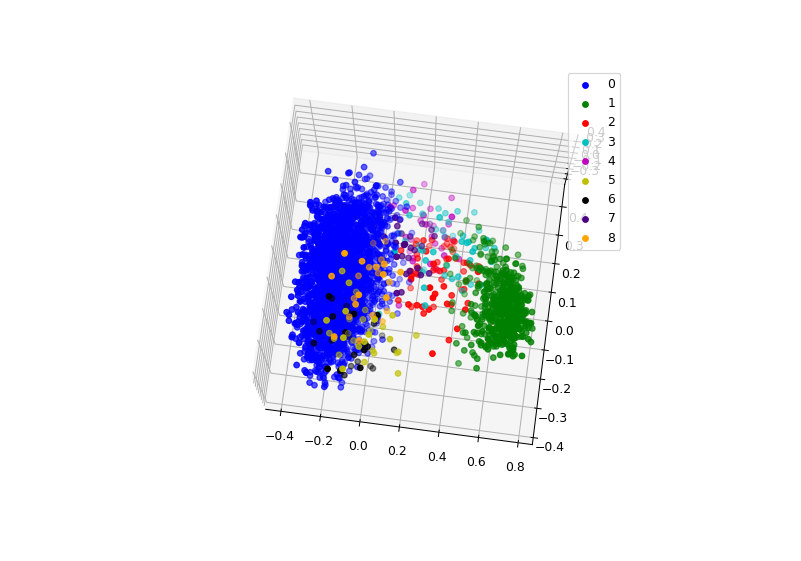

In [89]:
import matplotlib.pyplot as plt
%matplotlib notebook


fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection ="3d")
c = ["b", "g", "r", "c", "m", "y", "k", "indigo", "orange"]
start_idx = 0
for i, cluster in enumerate(clusters):
    embed_red = pca_result[start_idx:start_idx + len(cluster)]
#     print(embed_red.shape)
    start_idx += len(cluster)
    ax.scatter3D(embed_red[:, 0], embed_red[:, 1], embed_red[:, 2], color=c[i], label=i)
plt.legend()

In [71]:
top_k_genre = 3
# acoustic_features = ["mode", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
features = ["song_popularity", "explicit", "release_year", "mode", "danceability", "energy", "loudness", "speechiness", "valence", "tempo"]

features_norm = ["explicit", "mode", "acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]



# averages
avg_feat_vals = dict()
for feat in features:
    avg_feat_vals[feat] = np.mean(df_clean[feat])


for i, cluster in enumerate(clusters):
    
    print(f"\nCluster #{i + 1}")
    df_sub = df_clean.iloc[cluster]
    
    # top 3 genres
    print(df_sub["genre"].value_counts()[:top_k_genre])
    
    print("\nFeatures wrt to global average")
    for feat in features:
        if feat in features_norm:
            print(f"{feat} : {(np.mean(df_sub[feat]) - avg_feat_vals[feat]) * 100}%")
        else:
            print(f"{feat} : {(np.mean(df_sub[feat]) - avg_feat_vals[feat])}")
    


Cluster #1
adult standards    405
pop                348
soul/motown        274
Name: genre, dtype: int64

Features wrt to global average
song_popularity : -2.8733537917582908
explicit : -8.342831410848996%
release_year : -1.9703100780111527
mode : -0.20987579719584648%
danceability : -1.5771533121025971%
energy : -4.2416801347959225%
loudness : -0.3810754426399008
speechiness : -2.053152053315208%
valence : -2.797240644338017%
tempo : -0.4134509077368733

Cluster #2
pop rap             392
hip-hop/rap          64
dance/electronic     15
Name: genre, dtype: int64

Features wrt to global average
song_popularity : 9.520737151198318
explicit : 68.64872586959966%
release_year : 11.135831805734824
mode : -11.419931201484602%
danceability : 14.328590988299716%
energy : 4.380591491841479%
loudness : 2.124688440604703
speechiness : 13.19120135729966%
valence : -4.676694729218999%
tempo : -2.958269659345518

Cluster #3
country         56
pop              2
classic rock     2
Name: genre, dtype

## Observations
- clear group for rap (2), country (3), disco (4), latin (8), christmas (9)
- rap is (obviously) more explicit (68%). Also more danceable (14%) and speechy (13%).
- country has more enegery (16%)
- disco/soul has high valence (19%)
- cluster 6 has less valence (14%)
- latin in more minor keys (-27%)
- christmas has less energy (-16%) and valence (-14%)

# Agglomerative Clustering

https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/agglomerative.py

In [74]:
embedding_norms.shape

(16068, 1)

In [83]:
from sklearn.cluster import AgglomerativeClustering


n_songs = 1000

# Normalize the embeddings to unit length
corpus_embedding_cpu = corpus_embeddings.cpu().data.numpy()
if n_songs is not None:
    corpus_embedding_cpu = corpus_embedding_cpu[:n_songs]
embedding_norms = np.linalg.norm(corpus_embedding_cpu, axis=1, keepdims=True)
corpus_embedding_cpu = corpus_embedding_cpu /  embedding_norms

# Perform clustering
print("start clustering")
start_time = time.time()
# clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model = AgglomerativeClustering(n_clusters=20, distance_threshold=None) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embedding_cpu)
cluster_assignment = clustering_model.labels_
proc_time = time.time() - start_time
print(f"clustering time : {proc_time} seconds")

n_clusters = len(list(set(clustering_model.labels_)))
print("number of clusters", n_clusters)

start clustering
clustering time : 0.18985962867736816 seconds
number of clusters 20


In [88]:
max_len = 100
clustered_sentences = {}
clustered_songs = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
        clustered_songs[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus_sentences[sentence_id][:max_len])
    clustered_songs[cluster_id].append(f"{song_names[sentence_id]} by {artists[sentence_id]} ({genre[sentence_id]})")
    

# for i, cluster in clustered_sentences.items():
#     print("Cluster ", i+1)
#     print(cluster)
#     print("")
for i, cluster in clustered_songs.items():
    print(f"Cluster {i+1}, {len(cluster)} songs")
    print(cluster)
    print("")

Cluster 14, 65 songs
['thank u, next by Ariana Grande (dance/electronic)', 'Lucid Dreams by Juice WRLD (hip-hop/rap)', 'She Got the Best of Me by Luke Combs (country)', 'Best Shot by Jimmie Allen (country)', 'Be Alright by Dean Lewis (pop)', 'Consequences by Camila Cabello (dance/electronic)', "when the party's over by Billie Eilish (pop)", 'broken by lovelytheband (indie/alternative)', 'I Like Me Better by Lauv (dance/electronic)', 'Back To You by Selena Gomez (dance/electronic)', 'Hotel Key by Old Dominion (country)', 'Break Up in the End by Cole Swindell (country)', 'Mine by Bazzi (dance/electronic)', 'Kiss Somebody by Morgan Evans (country)', 'One Number Away by Luke Combs (country)', 'March 14 by Drake (pop rap)', 'Wait by Maroon 5 (pop)', 'IDGAF by Dua Lipa (dance/electronic)', 'No Mistakes by Kanye West (pop rap)', 'For The First Time by Darius Rucker (pop)', 'Bad At Love by Halsey (dance/electronic)', 'Marry Me by Thomas Rhett (country)', 'Want You Back by 5 Seconds of Summer (